In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import bisect
from scipy import stats
from ast import literal_eval
import functions as f

path = ".."

In [2]:
import importlib
importlib.reload(f)

<module 'functions' from '/Users/ss4316/Documents/Research/gender_visibility/replication/code/functions.py'>

In [3]:
df = pd.read_csv(f'{path}/data/panel_bios_anonymized.tsv',
                 low_memory=False,
                 sep = "\t")

df = df[df['active']==1].reset_index()

In [4]:
print(f"Number of users with at least 1 authored tweet {len(df)}")

Number of users with at least 1 authored tweet 549105


### Note:
Our anonymized dataset produces slight different responses than reported in the paper.

In [5]:
f.calc_stats("pronoun_gender", df)

,mean_retweet_avg,median_retweet_avg,mean_likes_avg,median_likes_avg,mean_followers,median_followers,mean_ntweets,median_ntweets,n_users
pronoun_gender,,,,,,,,,
Female,0.72,0.12,7.78,2.24,1579.98,421.69,957.61,242.25,15636
Male,0.61,0.11,6.45,2.11,1877.57,407.71,1326.55,356.08,8344
Mixed_pro,0.58,0.11,5.99,2.23,1094.86,346.70,1275.51,356.03,1271
Non-binary,0.65,0.11,6.35,2.08,1408.02,292.75,1335.89,321.53,840
NaN,0.41,0.05,3.58,0.87,1146.71,243.57,412.74,43.61,523014


In [6]:
f.calc_stats("word_gender", df)

,mean_retweet_avg,median_retweet_avg,mean_likes_avg,median_likes_avg,mean_followers,median_followers,mean_ntweets,median_ntweets,n_users
word_gender,,,,,,,,,
Female,0.32,0.05,3.14,0.86,983.59,218.89,397.94,38.02,53691
Male,0.36,0.05,3.53,0.98,1211.52,238.95,443.64,53.42,40594
Mixed_gen_word,0.19,0.04,2.31,0.78,641.61,170.43,367.78,34.87,3662
Non-binary,0.21,0.06,2.73,2.16,804.77,357.78,2565.36,662.10,49
NaN,0.44,0.05,3.86,0.92,1193.31,255.20,451.79,47.82,451109


In [8]:
f.calc_stats("pronoun_word_gender", df)

,mean_retweet_avg,median_retweet_avg,mean_likes_avg,median_likes_avg,mean_followers,median_followers,mean_ntweets,median_ntweets,n_users
pronoun_word_gender,,,,,,,,,
Different_pro_gen_words,0.36,0.10,4.32,2.12,1085.96,383.48,1828.56,384.26,294
Female,0.41,0.06,4.12,1.07,1100.84,251.47,503.98,52.22,66909
Male,0.40,0.06,4.01,1.11,1309.37,258.11,575.74,69.87,47776
Mixed_gen_word,0.19,0.04,2.30,0.76,637.05,167.99,350.20,33.86,3604
Mixed_pro,0.58,0.11,6.10,2.22,1102.15,340.74,1185.48,352.03,1184
Non-binary,0.66,0.11,6.32,2.09,1421.79,294.03,1343.85,315.95,826
NaN,0.43,0.05,3.67,0.87,1170.06,249.07,417.99,44.26,428512


In [9]:
f.calc_stats("voter_file_sex", df)

,mean_retweet_avg,median_retweet_avg,mean_likes_avg,median_likes_avg,mean_followers,median_followers,mean_ntweets,median_ntweets,n_users
voter_file_sex,,,,,,,,,
Female,0.37,0.05,3.34,0.88,1023.48,248.93,412.99,40.76,263185
Male,0.45,0.05,4.13,0.95,1298.03,248.66,482.49,54.32,261436
Unknown,0.55,0.06,4.25,0.97,1387.69,270.66,401.15,50.18,24484


In [123]:
f.calc_stats("gold_gender", df)

,mean_retweet_avg,median_retweet_avg,mean_likes_avg,median_likes_avg,mean_followers,median_followers,mean_ntweets,median_ntweets,median_age,n_users
gold_gender,,,,,,,,,,
Female,0.42,0.07,3.96,1.43,1541.34,365.0,796.56,98.0,42.0,2135
Male,0.58,0.06,4.45,1.27,1721.49,322.0,891.23,99.0,42.0,2114
Mixed,0.45,0.05,4.93,1.28,907.06,233.0,800.51,99.0,39.0,391
Non-binary,0.42,0.05,4.01,1.29,663.93,299.0,1700.07,913.0,29.0,15
Not sure,1.06,0.06,11.20,1.30,1528.21,238.0,1202.84,99.0,40.0,123
NaN,0.42,0.01,3.75,0.78,1167.00,211.0,441.98,39.0,42.0,544327


In [124]:
f.run_all_mann(df, "voter_file_sex", "Male", "Female", "greater")

{'likes': (36107244663.0, 2.0426244861590884e-213),
 'retweets': (35728619100.5, 3.615624843789042e-144),
 'followers': (34542646750.5, 0.005450543433564414)}

In [125]:
f.run_all_mann(df, "word_gender", "Male", "Female", "greater")

{'likes': (1166606942.5, 1.1222283629164514e-77),
 'retweets': (1148921497.5, 3.3036195031973315e-52),
 'followers': (1143461779.0, 8.422499462547747e-39)}

In [126]:
f.run_all_mann(df, "pronoun_gender", "Male", "Female", "less")

{'likes': (63853117.5, 0.003433888105295582),
 'retweets': (64604747.0, 0.10854012049921774),
 'followers': (63475030.0, 0.0002869892374420969)}

In [127]:
df["pronoun_gender_g"] = df.pronoun_gender
df.loc[df.pronoun_gender_g.isin(["Female","Male"]), "pronoun_gender_g"] = "Binary"
f.run_all_mann(df, "pronoun_gender_g", "Binary", "Non-binary", "greater")

{'likes': (10737993.5, 0.0005477800216757813),
 'retweets': (10722932.5, 0.0006887297832212661),
 'followers': (11838010.5, 2.4898961107940937e-18)}

In [128]:
df["uses_pronouns"] = ~pd.isna(df.pronoun_gender)
f.run_all_mann(df, "uses_pronouns", True, False, "greater")

{'likes': (10111381286.0, 0.0),
 'retweets': (9178574943.5, 0.0),
 'followers': (8669631605.5, 0.0)}

In [129]:
# NOTE: The age calculation can not be done on the anomymized dataset
# print(f"Median age of pronoun users {np.median(df.loc[(df.uses_pronouns) & (~pd.isna(df.age)), 'age'])}")
# df["uses_words"] = ~pd.isna(df.word_gender)
# print(f"Median age of gendered words users {np.median(df.loc[(df.uses_words) & (~pd.isna(df.age)), 'age'])}")

Median age of pronoun users 35.0
Median age of gendered words users 46.0


In [130]:
f.run_all_mann(df, "code_gender", "Male", "Female", "less")

{'likes': (2179616.5, 0.02693490533117898),
 'retweets': (2209489.0, 0.11808288070000955),
 'followers': (2190370.5, 0.0485696442148006)}

In [131]:
df["code_gender_g"] = df.gold_gender
df.loc[df.gold_gender_g.isin(["Female","Male"]), "gold_gender_g"] = "Binary"
df.loc[df.gold_gender_g.isin(["Non-binary","Mixed", "Not sure"]), "code_gender_g"] = "Other"
f.run_all_mann(df, "code_gender_g", "Binary", "Other", "greater")

{'likes': (1140396.5, 0.29024125905280795),
 'retweets': (1180583.0, 0.02855622687751495),
 'followers': (1304463.5, 7.881481176914202e-10)}

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

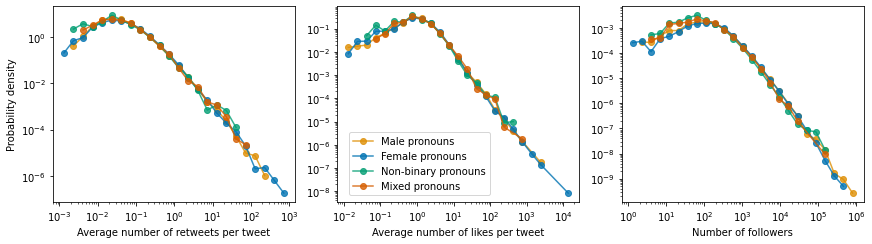

In [145]:
df.loc[df.pronoun_gender == "Mixed_pro", "pronoun_gender"] = "Mixed pronouns"
df.loc[df.pronoun_gender == "Female", "pronoun_gender"] = "Female pronouns"
df.loc[df.pronoun_gender == "Male", "pronoun_gender"] = "Male pronouns"
df.loc[df.pronoun_gender == "Non-binary", "pronoun_gender"] = "Non-binary pronouns"

f.plot_mul_hist(df, "pronoun_gender", 25, "loglog",
         path = f"{path}/plots/histogram_pronouns",
         size = (12,3.5))    

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

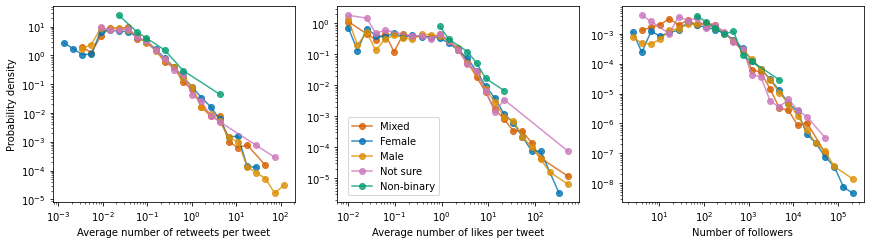

In [146]:
f.plot_mul_hist(df, "code_gender", 25, "loglog",
         path = f"{path}/plots/histogram_handcoding",
         size = (12,3.5))    